# DL_101: NN Introduction

## Influence of Weights and Bias on the Shape of the Activation Functions

For Questions on this Exercise: anmuel@ethz.ch

In [35]:
# import libraries
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # prevents a restart of the kernel

import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
import matplotlib
import matplotlib.pyplot as plt

In [21]:
# define activation function
def relu(x):
    if x > 0:
        return x
    else: return 0
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))
def tanh(x):
    return np.tanh(x)

In [28]:
# define Weight and Bias for the Layer (try out different variatios)
w1 = +2
b1 = +2
# choose activation function
act = relu

x = np.linspace(start=-10, stop=10, num=1000)
y = np.array([act(xi * 1 + 0) for xi in x])
y_act = np.array([act(xi * w1 + b1) for xi in x])


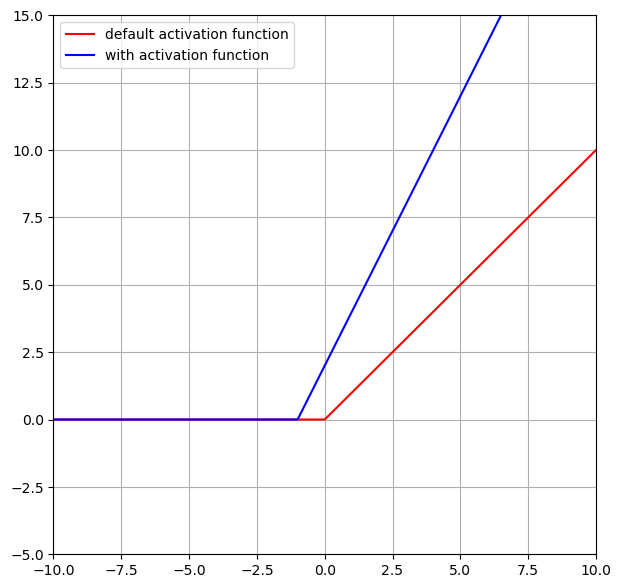

In [34]:
plt.figure(figsize=(7,7))
plt.xlim(-10,10)
plt.ylim(-5,15)

plt.plot(x, y, color="red", label="default activation function")
plt.plot(x, y_act, color="blue", label="with activation function")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# define Weight and Bias for the Output
w2 = 1
b2 = -5
y_out = np.array([(xi * w2 + b2) for xi in y_act])

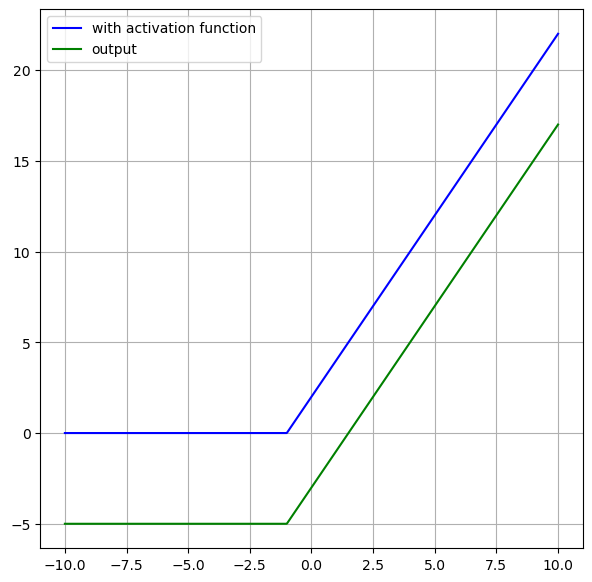

In [32]:
plt.figure(figsize=(7,7))
plt.grid(True)
plt.plot(x, y_act, color="blue", label="with activation function")
plt.plot(x, y_out, color="green", label="output")
plt.legend()
plt.show()

## Influence of the Activation Functions on the Prediction Performance

In [36]:
# Define random Problem
def f(x):
    return x**4 + -5*x**3 + 14*x**2 + x + 10
x = np.linspace(start=-10.0, stop=10.0, num=2000).reshape(-1, 1)
y = f(x)

In [37]:
model = Sequential()
model.add(Dense(200)) # Input zu Hidden
model.add(Dense(200)) # Input zu Hidden
model.add(Dense(1)) # Vom Hidden zum Output
model.compile(optimizer=Adam(learning_rate=1e-2), loss="mse")
model.fit(x, y, epochs=30)
y_pred_linear = model.predict(x)

C:\Users\anmuel\AppData\Local\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
63/63 [==============================] - 3s 7ms/step - loss: 14354105.0000
Epoch 2/30
63/63 [==============================] - 0s 5ms/step - loss: 10152844.0000
Epoch 3/30
63/63 [==============================] - 0s 5ms/step - loss: 10060893.0000
Epoch 4/30
63/63 [==============================] - 0s 7ms/step - loss: 10331819.0000
Epoch 5/30
63/63 [==============================] - 1s 8ms/step - loss: 10198704.0000
Epoch 6/30
63/63 [==============================] - 0s 7ms/step - loss: 10197751.0000
Epoch 7/30
63/63 [==============================] - 0s 7ms/step - loss: 10154725.0000
Epoch 8/30
63/63 [==============================] - 1s 9ms/step - loss: 10251342.0000
Epoch 9/30
63/63 [==============================] - 0s 7ms/step - loss: 10114613.0000
Epoch 10/30
63/63 [==============================] - 0s 6ms/step - loss: 10161217.0000
Epoch 11/30
63/63 [==============================] - 0s 6ms/step - loss: 10135493.0000
Epoch 12/30
63/63 [==============================] -

In [ ]:
model = Sequential()
model.add(Dense(500)) # Input to Hidden
model.add(Activation("relu")) # ReLU after Hidden
model.add(Dense(500)) # Input to Hidden
model.add(Activation("relu")) # ReLU after Hidden
model.add(Dense(1)) # From Hidden to Output
model.compile(optimizer=Adam(learning_rate=1e-2), loss="mse")
model.fit(x, y, epochs=30)
y_pred_relu = model.predict(x)

In [45]:
model = Sequential()
model.add(Dense(500)) # Input to Hidden
model.add(Activation("sigmoid")) # sigmoid after Hidden
#model.add(Activation("relu")) # ReLU vom Hidden
model.add(Dense(500)) # Input to Hidden
model.add(Activation("sigmoid")) # sigmoid after Hidden
model.add(Dense(1)) # From Hidden to Output
model.compile(optimizer=Adam(learning_rate=1e-2), loss="mse")
model.fit(x, y, epochs=30)
y_pred_sigmoid = model.predict(x)

Epoch 1/30
63/63 [==============================] - 1s 6ms/step - loss: 18671420.0000
Epoch 2/30
63/63 [==============================] - 0s 7ms/step - loss: 17844550.0000
Epoch 3/30
63/63 [==============================] - 1s 8ms/step - loss: 17096228.0000
Epoch 4/30
63/63 [==============================] - 1s 12ms/step - loss: 16393866.0000
Epoch 5/30
63/63 [==============================] - 1s 12ms/step - loss: 15736247.0000
Epoch 6/30
63/63 [==============================] - 1s 10ms/step - loss: 15113567.0000
Epoch 7/30
63/63 [==============================] - 1s 12ms/step - loss: 14525955.0000
Epoch 8/30
63/63 [==============================] - 1s 15ms/step - loss: 13975306.0000
Epoch 9/30
63/63 [==============================] - 1s 14ms/step - loss: 13445267.0000
Epoch 10/30
63/63 [==============================] - 1s 14ms/step - loss: 12972930.0000
Epoch 11/30
63/63 [==============================] - 1s 11ms/step - loss: 12478170.0000
Epoch 12/30
63/63 [=========================

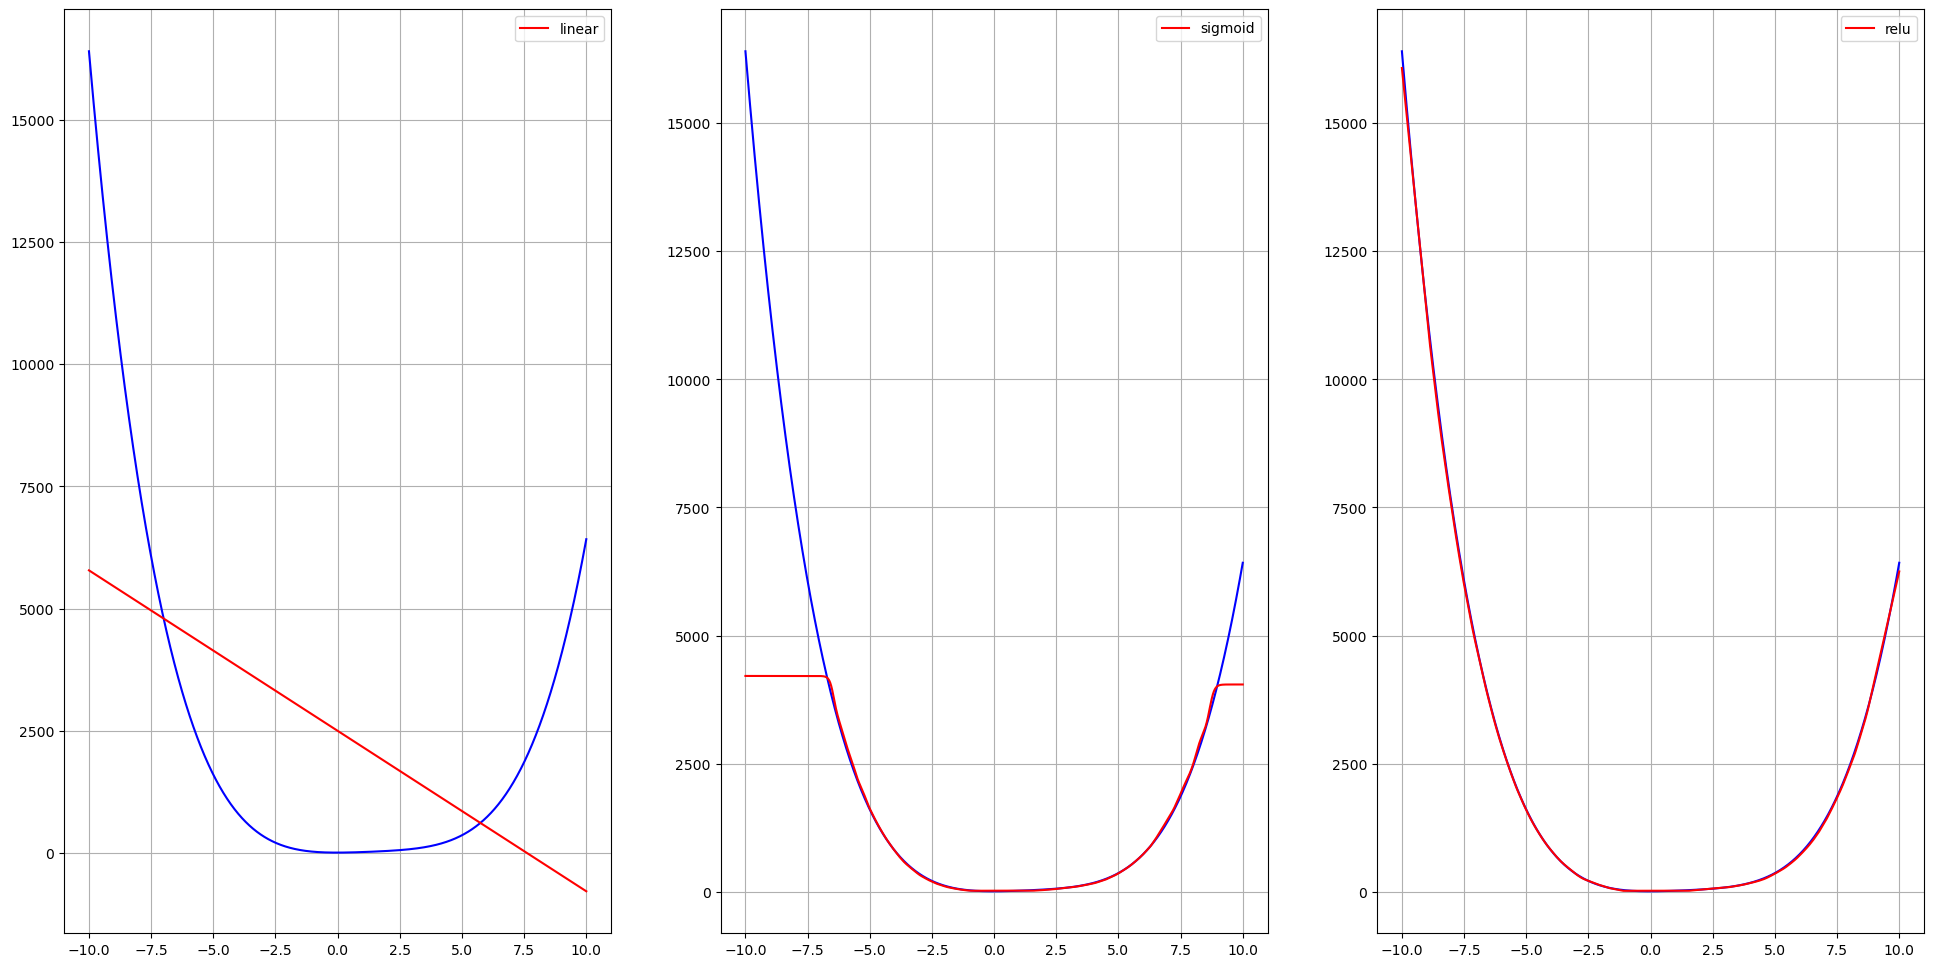

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24,12))
ax1.plot(x, y, color="blue")
ax1.plot(x.flatten(), y_pred_linear.flatten(), color="red", label="linear")
ax1.grid(True)
ax1.legend()
ax2.plot(x, y, color="blue")
ax2.plot(x.flatten(), y_pred_sigmoid.flatten(), color="red", label="sigmoid")
ax2.grid(True)
ax2.legend()
ax3.plot(x, y, color="blue")
ax3.plot(x.flatten(), y_pred_relu.flatten(), color="red", label="relu")
ax3.grid(True)
ax3.legend()

## Influence of the amount of neurons

In [47]:
# Define random artificial problem f(x)
def f(x):
    return x**2 + x + 10
x = np.linspace(start=-10, stop=+10, num=1000).reshape(-1,1)
y = f(x)

In [48]:
# Build simple sequential model
model = Sequential()
model.add(Dense(12))
model.add(Activation("relu")) # ReLU after Hidden
model.add(Dense(1)) # From Hidden to Output
model.compile(optimizer=Adam(learning_rate=5e-2), loss="mse")
model.fit(x, y, epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 3ms/step - loss: 1762.9630
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 213.4981
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 87.2624
Epoch 4/50
32/32 [==============================] - 0s 7ms/step - loss: 71.0107
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 57.7341
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 47.7338
Epoch 7/50
32/32 [==============================] - 0s 5ms/step - loss: 38.4440
Epoch 8/50
32/32 [==============================] - 0s 5ms/step - loss: 31.3691
Epoch 9/50
32/32 [==============================] - 0s 4ms/step - loss: 26.1773
Epoch 10/50
32/32 [==============================] - 0s 6ms/step - loss: 21.9483
Epoch 11/50
32/32 [==============================] - 0s 5ms/step - loss: 18.4358
Epoch 12/50
32/32 [==============================] - 0s 8ms/step - loss: 15.3427
Epoch 13/50
32/32 [===============

In [49]:
W, b = model.layers[0].get_weights()
W2, b2 = model.layers[2].get_weights()
W, b, W2, b2 = W.flatten(), b.flatten(), W2.flatten(), b2.flatten()

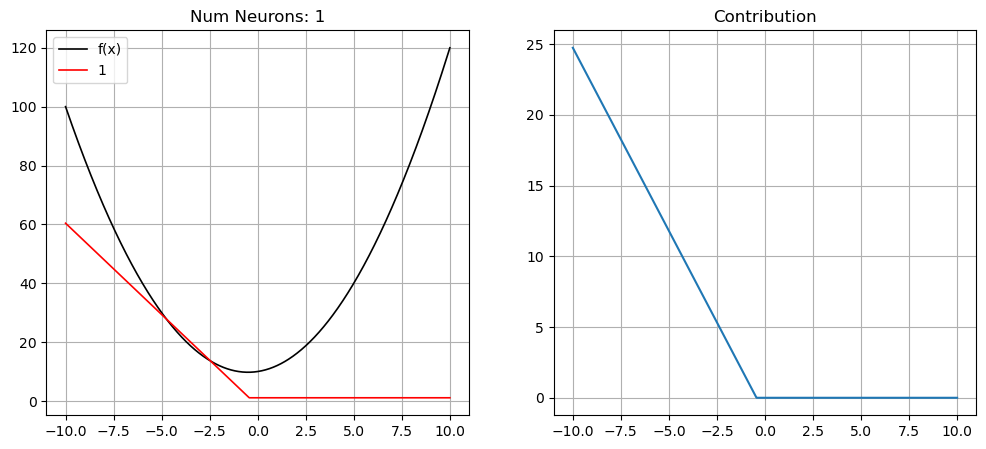

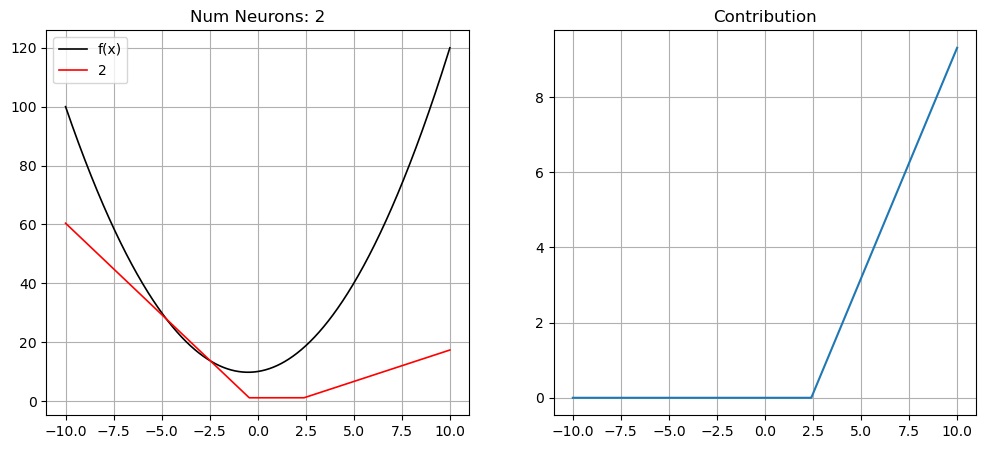

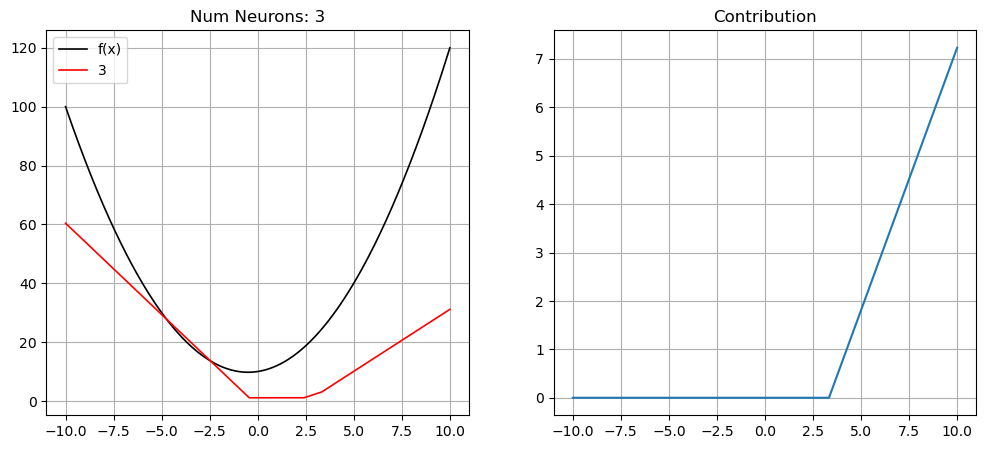

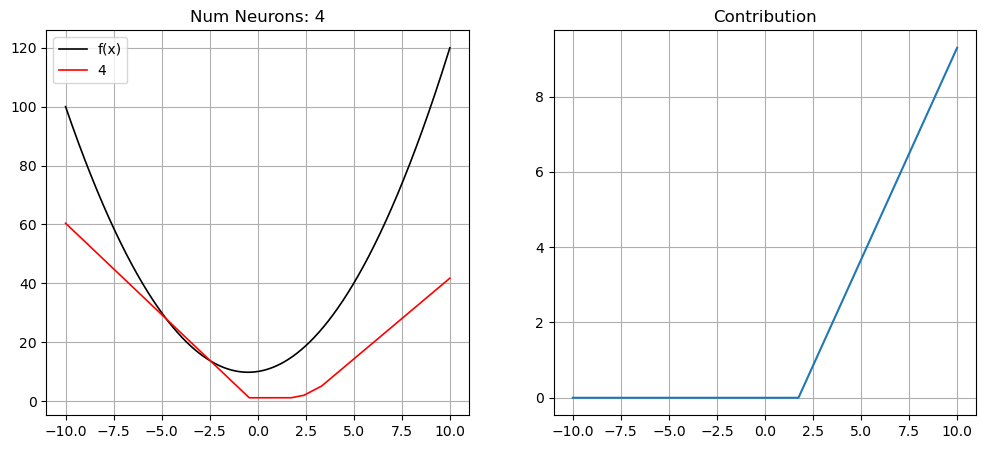

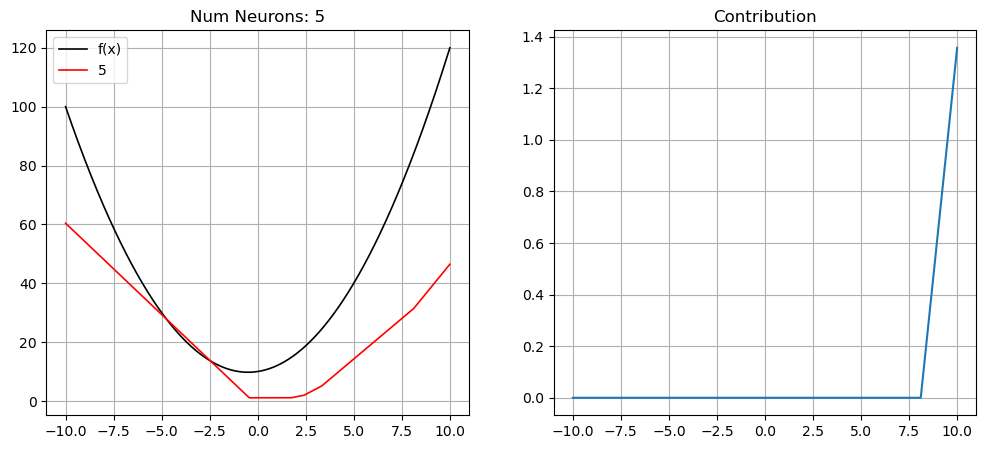

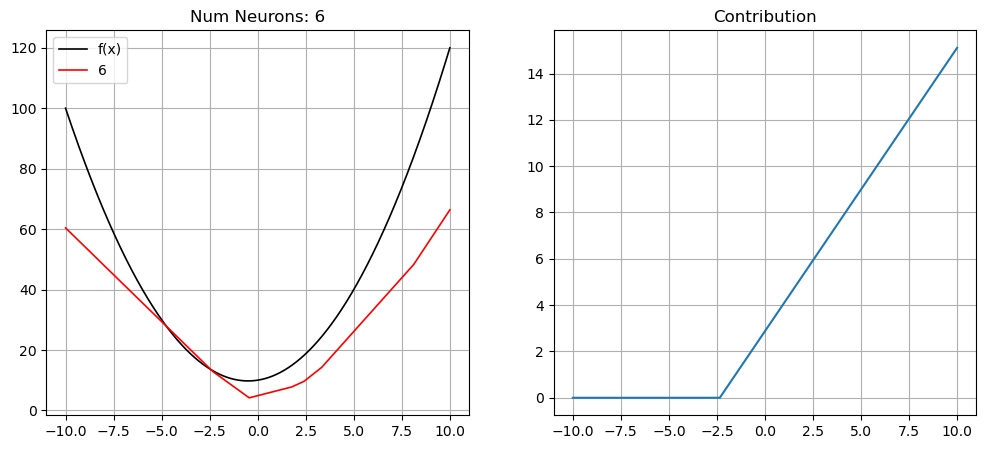

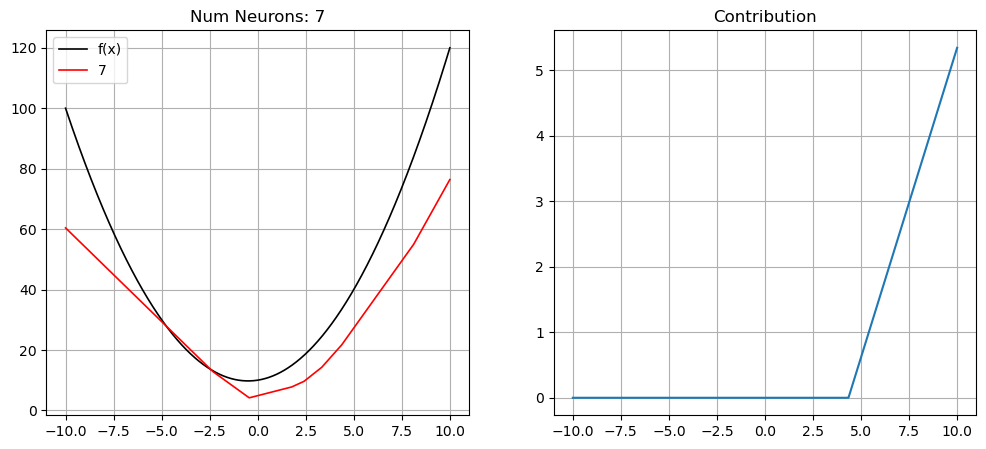

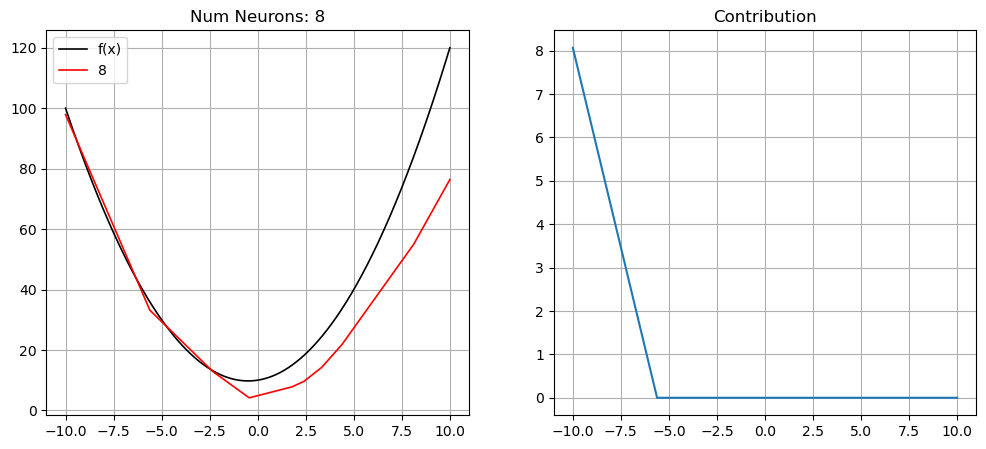

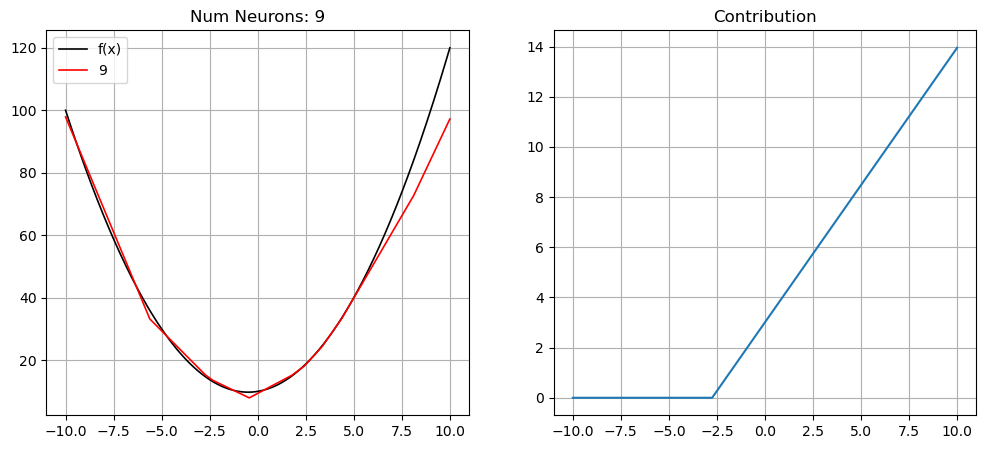

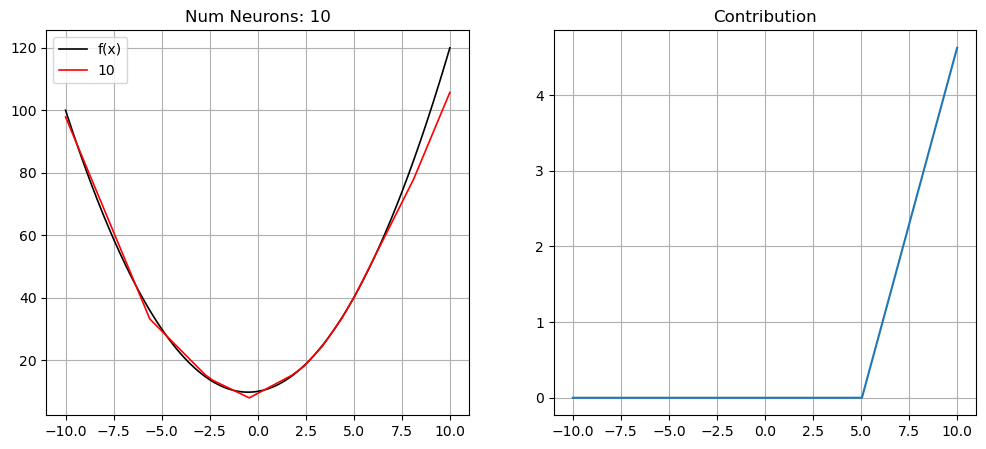

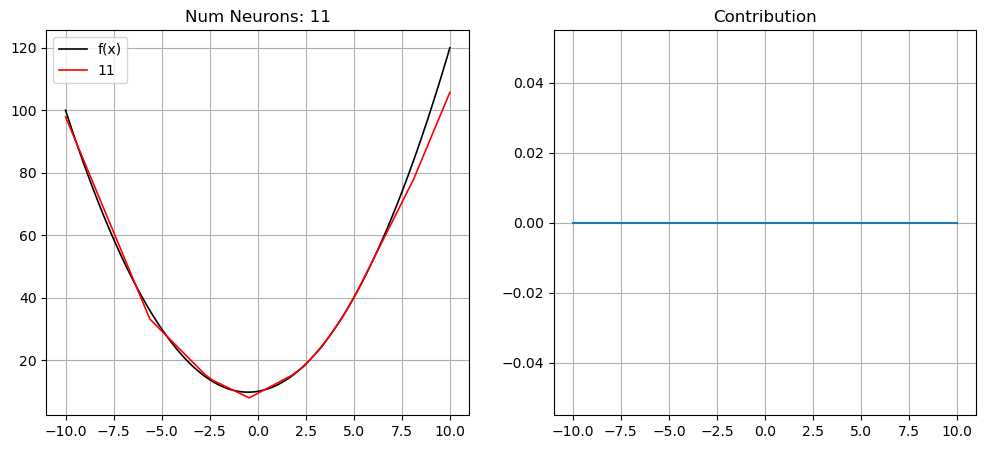

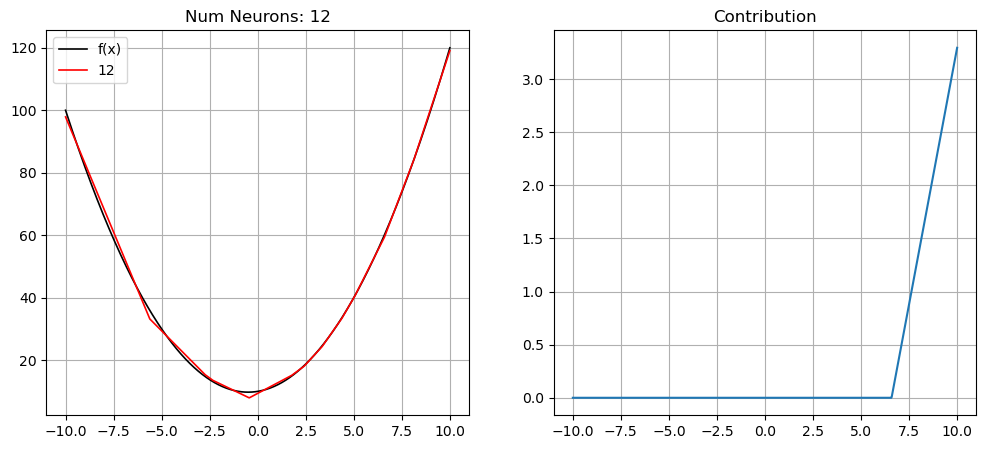

In [56]:
for i in range (1, len(W)+1):
    y_hidden = np.array([W[:i] * xi + b[:i] for xi in x])
    y_relu = np.array([[relu(yhi) for yhi in yh] for yh in y_hidden])
    y_output = np.array([np.dot(W2[:i], yri) + b2 for yri in y_relu])
 
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
    ax1.grid(True)
    ax1.plot(x, y, color="k", linewidth=1.2, label="f(x)")
    ax1.plot(x.flatten(), y_output.flatten(), color="red", linewidth=1.2, label=str(i))
    ax1.legend()
    ax2.plot(x, y_relu.T[-1])
    ax2.grid(True)
    ax1.title.set_text("Num. Neurons: " + str(i))
    ax2.title.set_text("Contribution")